In [1]:
# Plotting imports
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

sns.set_style('white')

In [2]:
# Other imports
import pandas as pd
import numpy as np
from scipy.cluster import hierarchy
from scipy.stats.mstats import mquantiles
import fastcluster as fst

In [3]:
# Generate random data
# but with some correlated observations
a = [list(np.random.normal(size=10, scale=.8)) +
      list(np.random.normal(size=20, loc=0.1, scale=0.3)) +
      list(np.random.normal(size=20, loc=-0.1, scale=0.1))
      for i in range(9)]
a += [list(np.random.normal(size=30, scale=.4)) +
      list(np.random.normal(size=10, loc=0.7, scale=0.1)) +
      list(np.random.normal(size=10, loc=-0.5, scale=0.1))
      for i in range(5)]
a += [list(np.random.normal(size=20, scale=.8)) +
      list(np.random.normal(size=15, loc=0.2, scale=0.2)) +
      list(np.random.normal(size=15, loc=-0.8, scale=0.2))
      for i in range(10)]
a += [list(np.random.normal(size=30, scale=.5))
      for i in range(5)]

In [4]:
# Correlate the data
# also precompute the linkage
# so we can pick up the 
# hierarchical thresholds beforehand
m = pd.DataFrame(a)
m = m.T.corr()
l = fst.linkage(m, method='average')

/usr/lib/python2.7/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


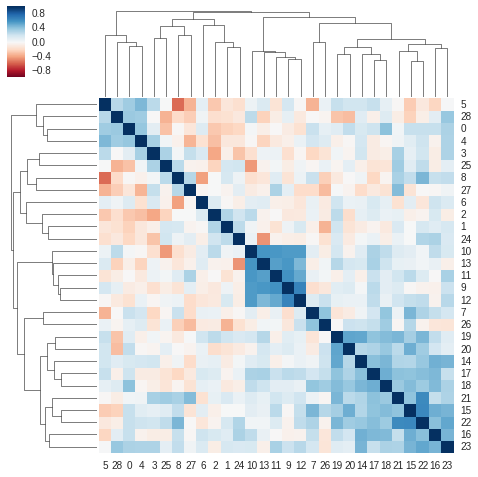

In [5]:
# Plot the clustermap
# Save the returned object for further plotting
mclust = sns.clustermap(m,
               linewidths=0,
               cmap=plt.get_cmap('RdBu'),
               vmax=1,
               vmin=-1,
               figsize=(8, 8),
               row_linkage=l,
               col_linkage=l)

In [6]:
# Threshold 1: MATLAB-like behavior
t = 0.7*max(l[:, 2])

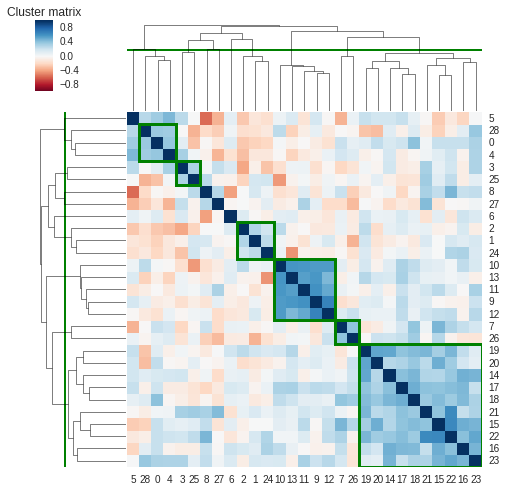

In [7]:
# Plot the clustermap
# Save the returned object for further plotting
mclust = sns.clustermap(m,
               linewidths=0,
               cmap=plt.get_cmap('RdBu'),
               vmax=1,
               vmin=-1,
               figsize=(8, 8),
               row_linkage=l,
               col_linkage=l)

# Draw the threshold lines
mclust.ax_col_dendrogram.hlines(t,
                               0,
                               m.shape[0]*10,
                               colors='g',
                               linewidths=2,
                               zorder=1)
mclust.ax_row_dendrogram.vlines(t,
                               0,
                               m.shape[0]*10,
                               colors='g',
                               linewidths=2,
                               zorder=1)

# Extract the clusters
clusters = hierarchy.fcluster(l, t, 'distance')
for c in set(clusters):
    # Retrieve the position in the clustered matrix
    index = [x for x in range(m.shape[0])
             if mclust.data2d.columns[x] in m.index[clusters == c]]
    # No singletons, please
    if len(index) == 1:
        continue

    # Draw a rectangle around the cluster
    mclust.ax_heatmap.add_patch(
        patches.Rectangle(
            (min(index),
             m.shape[0] - max(index) - 1),
                len(index),
                len(index),
                facecolor='none',
                edgecolor='g',
                lw=3)
        )

plt.title('Cluster matrix')

pass

In [8]:
# Threshold 1: median of the
# distance thresholds computed by scipy
t = np.median(hierarchy.maxdists(l))

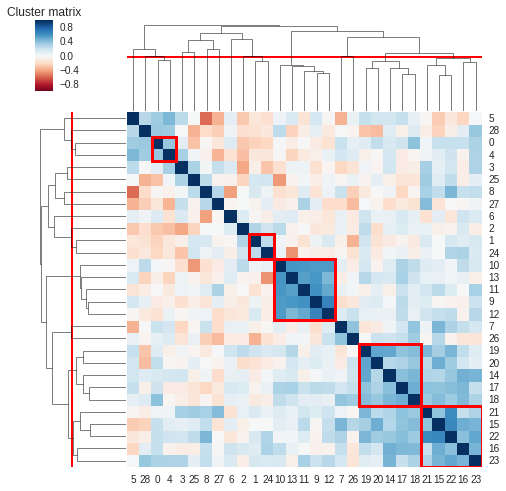

In [9]:
# Plot the clustermap
# Save the returned object for further plotting
mclust = sns.clustermap(m,
               linewidths=0,
               cmap=plt.get_cmap('RdBu'),
               vmax=1,
               vmin=-1,
               figsize=(8, 8),
               row_linkage=l,
               col_linkage=l)

# Draw the threshold lines
mclust.ax_col_dendrogram.hlines(t,
                               0,
                               m.shape[0]*10,
                               colors='r',
                               linewidths=2,
                               zorder=1)
mclust.ax_row_dendrogram.vlines(t,
                               0,
                               m.shape[0]*10,
                               colors='r',
                               linewidths=2,
                               zorder=1)

# Extract the clusters
clusters = hierarchy.fcluster(l, t, 'distance')
for c in set(clusters):
    # Retrieve the position in the clustered matrix
    index = [x for x in range(m.shape[0])
             if mclust.data2d.columns[x] in m.index[clusters == c]]
    # No singletons, please
    if len(index) == 1:
        continue

    # Draw a rectangle around the cluster
    mclust.ax_heatmap.add_patch(
        patches.Rectangle(
            (min(index),
             m.shape[0] - max(index) - 1),
                len(index),
                len(index),
                facecolor='none',
                edgecolor='r',
                lw=3)
        )

plt.title('Cluster matrix')

pass

In [10]:
# Threshold 2: higher quartile of
# the same distribution
t = mquantiles(hierarchy.maxdists(l), prob=0.75)[0]

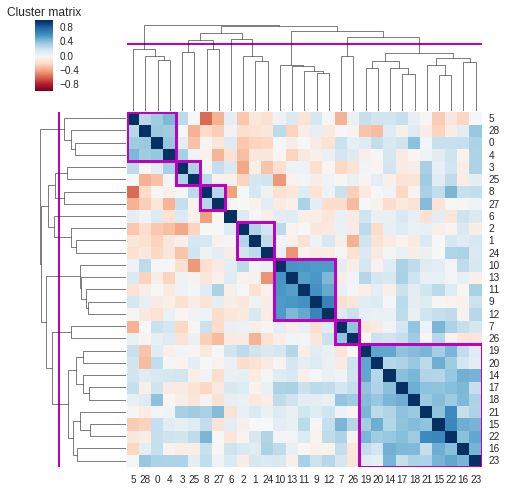

In [11]:
# Plot the clustermap
# Save the returned object for further plotting
mclust = sns.clustermap(m,
               linewidths=0,
               cmap=plt.get_cmap('RdBu'),
               vmax=1,
               vmin=-1,
               figsize=(8, 8),
               row_linkage=l,
               col_linkage=l)

# Draw the threshold lines
mclust.ax_col_dendrogram.hlines(t,
                               0,
                               m.shape[0]*10,
                               colors='m',
                               linewidths=2,
                               zorder=1)
mclust.ax_row_dendrogram.vlines(t,
                               0,
                               m.shape[0]*10,
                               colors='m',
                               linewidths=2,
                               zorder=1)

# Extract the clusters
clusters = hierarchy.fcluster(l, t, 'distance')
for c in set(clusters):
    # Retrieve the position in the clustered matrix
    index = [x for x in range(m.shape[0])
             if mclust.data2d.columns[x] in m.index[clusters == c]]
    # No singletons, please
    if len(index) == 1:
        continue

    # Draw a rectangle around the cluster
    mclust.ax_heatmap.add_patch(
        patches.Rectangle(
            (min(index),
             m.shape[0] - max(index) - 1),
                len(index),
                len(index),
                facecolor='none',
                edgecolor='m',
                lw=3)
        )

plt.title('Cluster matrix')

pass